In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"]="STSong"
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# 读取附件1和附件2的数据
df1 = pd.read_excel('附件1.xlsx')
df2 = pd.read_excel('附件2.xlsx')

In [4]:
# 检测重复值
dup1 = df1.duplicated() # 返回一个布尔型Series，表示每一行是否重复
dup2 = df2.duplicated()
df1_dup = df1[dup1] # 筛选出重复的行
df2_dup = df2[dup2]
print('附件1中有{}行重复值'.format(len(df1_dup)))
print('附件2中有{}行重复值'.format(len(df2_dup)))

# 检测缺失值
miss1 = df1.isnull() # 返回一个布尔型DataFrame，表示每个元素是否缺失
miss2 = df2.isnull()
df1_miss = df1[miss1.any(axis=1)] # 筛选出含有缺失值的行
df2_miss = df2[miss2.any(axis=1)]
print('附件1中有{}行缺失值'.format(len(df1_miss)))
print('附件2中有{}行缺失值'.format(len(df2_miss)))

# 读取附件1和附件2的数据
df3 = pd.read_excel('附件3.xlsx')
df4 = pd.read_excel('附件4.xlsx')

# 检测重复值
dup3 = df3.duplicated() # 返回一个布尔型Series，表示每一行是否重复
dup4 = df4.duplicated()
df3_dup = df3[dup3] # 筛选出重复的行
df4_dup = df4[dup4]
print('附件3中有{}行重复值'.format(len(df3_dup)))
print('附件4中有{}行重复值'.format(len(df4_dup)))

# 检测缺失值
miss3 = df3.isnull() # 返回一个布尔型DataFrame，表示每个元素是否缺失
miss4 = df4.isnull()
df3_miss = df3[miss3.any(axis=1)] # 筛选出含有缺失值的行
df4_miss = df4[miss4.any(axis=1)]
print('附件3中有{}行缺失值'.format(len(df3_miss)))
print('附件4中有{}行缺失值'.format(len(df4_miss)))

附件1中有0行重复值
附件2中有0行重复值
附件1中有0行缺失值
附件2中有0行缺失值
附件3中有0行重复值
附件4中有0行重复值
附件3中有0行缺失值
附件4中有0行缺失值


In [5]:
df = pd.merge(df1, df2, on='单品编码', how='inner')

In [6]:
# 展示合并后的前1000个样本
df.head(1000)

,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,0.74,5.00,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,0.50,5.00,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,0.30,5.00,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,0.38,5.00,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,0.26,5.00,销售,否
...,...,...,...,...,...,...,...,...,...,...
995,102900005115168,牛首生菜,1011010101,花叶类,2021-06-13,21:02:44.655,0.71,2.00,销售,否
996,102900005115168,牛首生菜,1011010101,花叶类,2021-06-13,21:05:34.967,0.71,2.00,销售,否
997,102900005115168,牛首生菜,1011010101,花叶类,2021-12-01,10:06:02.478,0.56,5.00,销售,否
998,102900005115168,牛首生菜,1011010101,花叶类,2021-12-01,10:40:26.264,0.32,5.00,销售,否


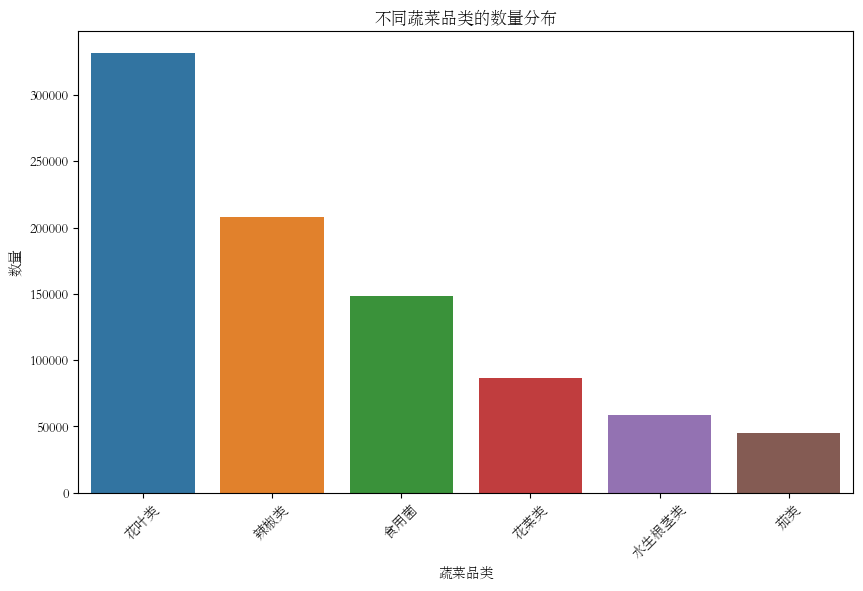

In [7]:
# 画出不同蔬菜品类的数量分布
plt.figure(figsize=(10, 6))
sns.countplot(x='分类名称', data=df, order=df['分类名称'].value_counts().index)
plt.xlabel('蔬菜品类')
plt.ylabel('数量')
plt.title('不同蔬菜品类的数量分布')
plt.xticks(rotation=45)  # 可选：旋转x轴标签以便更好地显示品类名称
plt.savefig('品类数量分布.png', dpi=600)
plt.show()

In [8]:
# 给出排名前50的单品的销售频率
top50 = df['单品名称'].value_counts().head(50)
print(top50)

芜湖青椒(1)     69945
西兰花         58905
西峡香菇(1)     47509
云南生菜        39887
净藕(1)       39285
紫茄子(2)      27455
泡泡椒(精品)     25338
云南油麦菜       23265
螺丝椒         22678
上海青         16644
竹叶菜         16186
金针菇(盒)      15591
青梗散花        15270
大白菜         15178
黄白菜(2)      14372
云南生菜(份)     14328
菠菜          14202
奶白菜         13355
小米椒         13335
红薯尖         13087
红椒(1)       12648
枝江青梗散花      12369
西峡花菇(1)     11407
金针菇(1)      11283
小米椒(份)      10848
青线椒         10608
苋菜          10299
菜心          10234
茼蒿          10128
娃娃菜          8994
云南油麦菜(份)     8863
枝江红菜苔        8732
螺丝椒(份)       8244
牛首油菜         8022
小青菜(1)       7910
杏鲍菇(1)       7581
奶白菜(份)       6925
平菇           6884
保康高山大白菜      6408
菠菜(份)        6354
洪湖莲藕(粉藕)     6004
青茄子(1)       6002
长线茄          5905
甜白菜          5888
小皱皮(份)       5178
杏鲍菇(2)       5063
黄心菜(1)       4806
红杭椒          4310
双孢菇(盒)       4232
东门口小白菜       4162
Name: 单品名称, dtype: int64


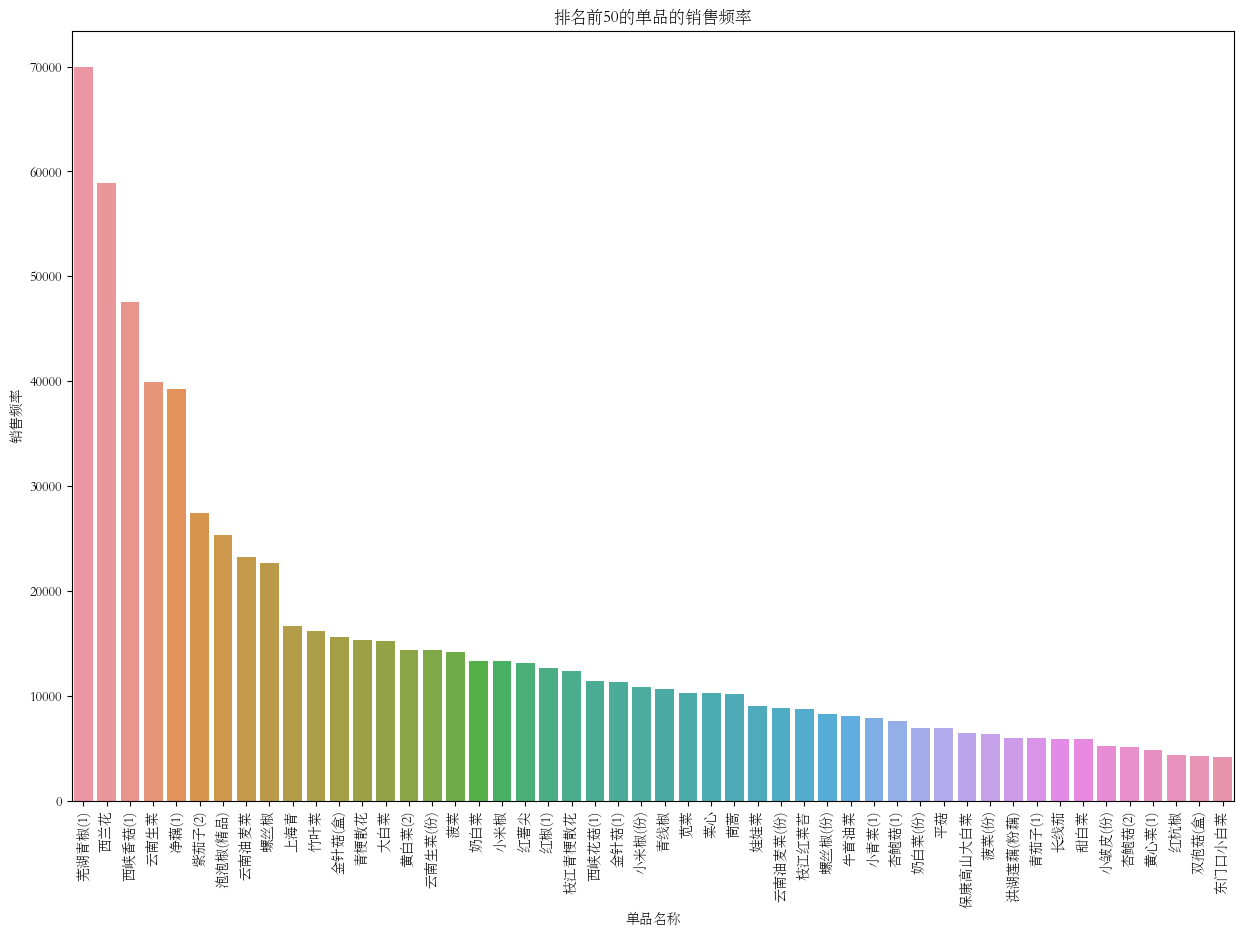

In [9]:
# 画出排名前50的单品的销售频率的柱状图
plt.figure(figsize=(15, 10))
sns.barplot(x=top50.index, y=top50.values)
plt.xticks(rotation=90)
plt.xlabel('单品名称')
plt.ylabel('销售频率')
plt.title('排名前50的单品的销售频率')
plt.savefig('单品销售频率.png', dpi=600)
plt.show()

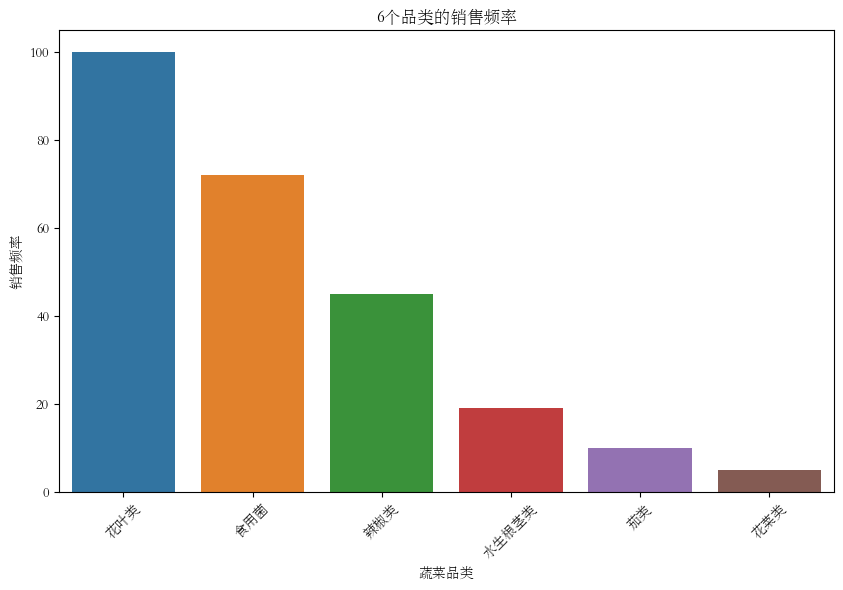

In [10]:
# 计算品类的销售频率
category_counts = df1['分类名称'].value_counts()

# 按销售频率从高到低排序
category_counts = category_counts.sort_values(ascending=False)

# 画出柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, order=category_counts.index)
plt.xlabel('蔬菜品类')
plt.ylabel('销售频率')
plt.title('6个品类的销售频率')
plt.xticks(rotation=45)  # 可选：旋转x轴标签以便更好地显示品类名称
plt.savefig('品类销售频率.png', dpi=600)
plt.show()

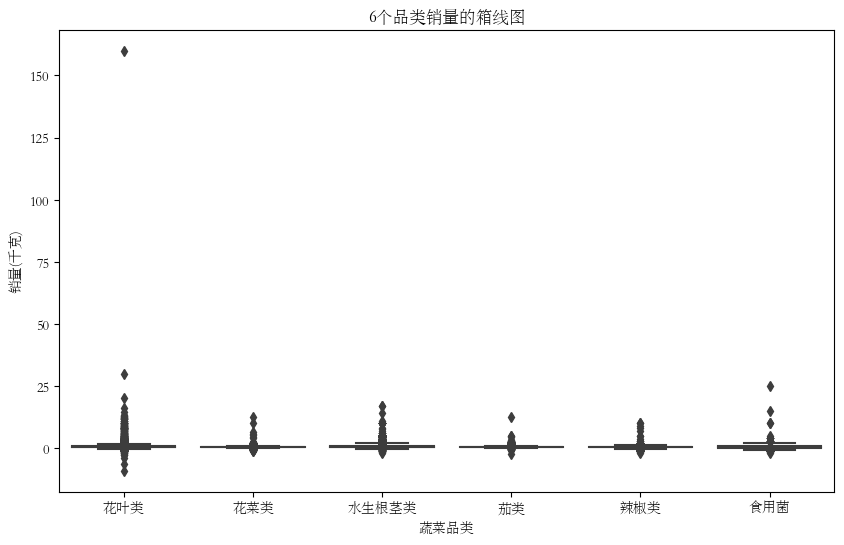

In [11]:
# 画出6个品类销量的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='分类名称', y='销量(千克)', data=df)
plt.xlabel('蔬菜品类')
plt.ylabel('销量(千克)')
plt.title('6个品类销量的箱线图')
plt.savefig('品类销量箱线图.png', dpi=600)
plt.show()

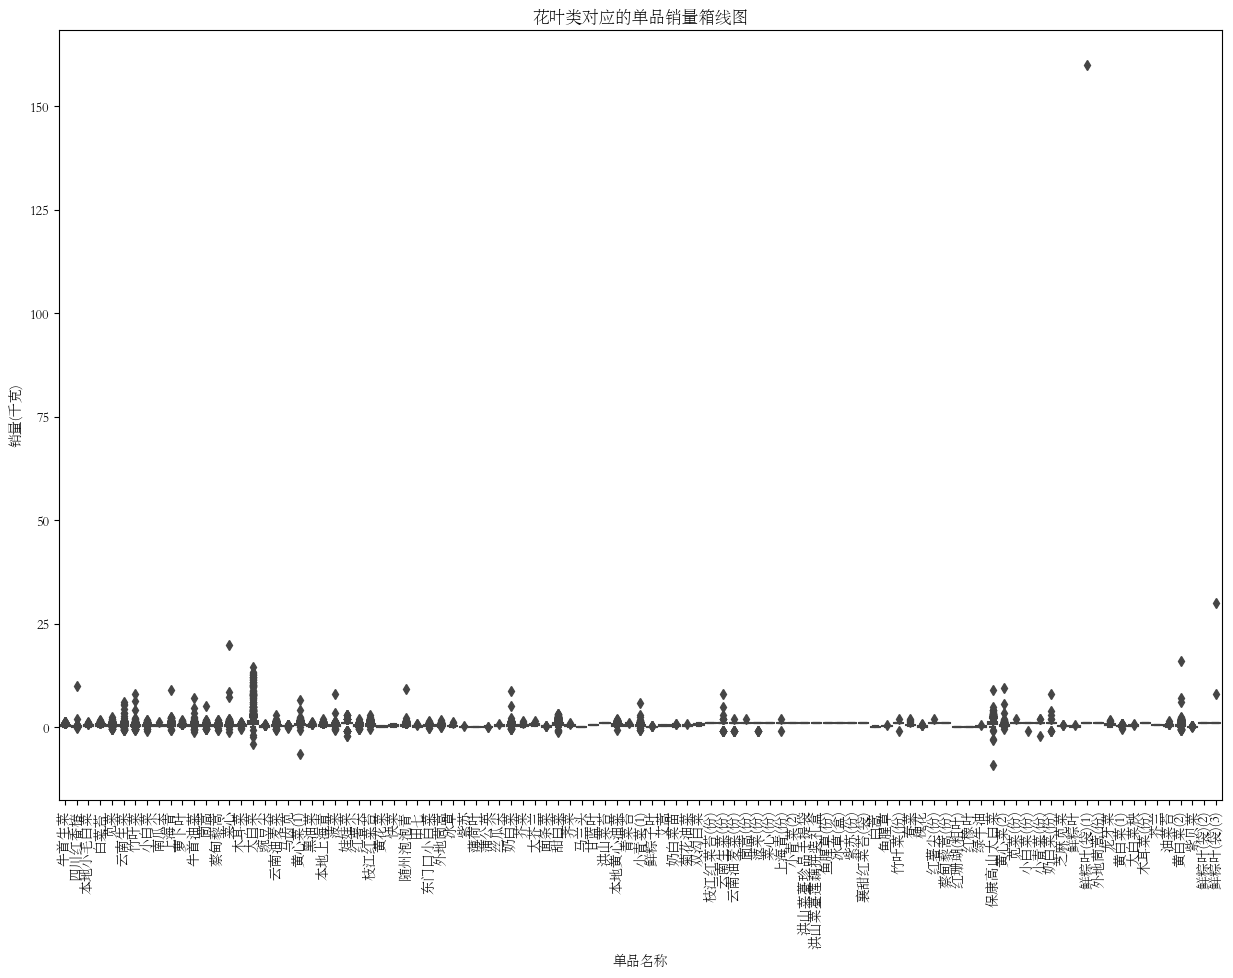

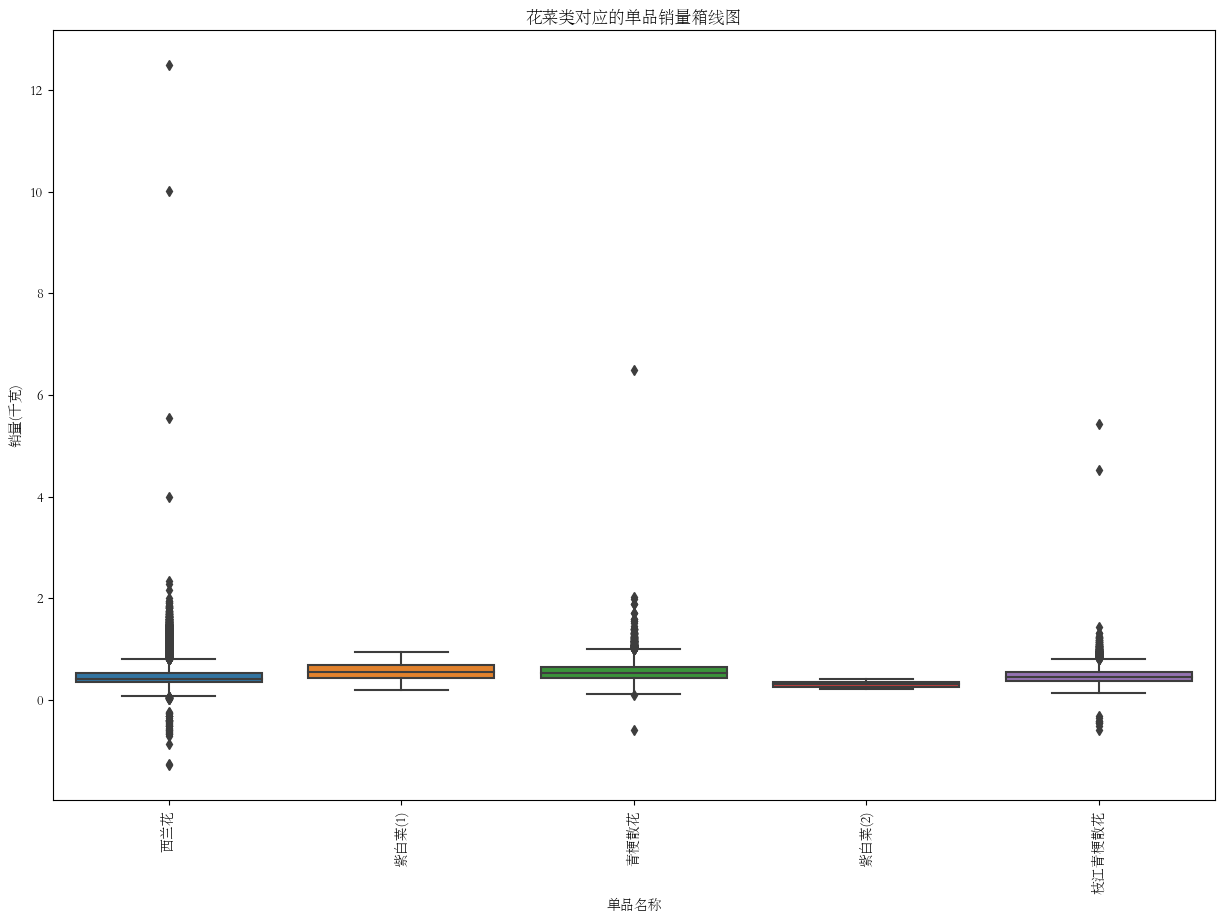

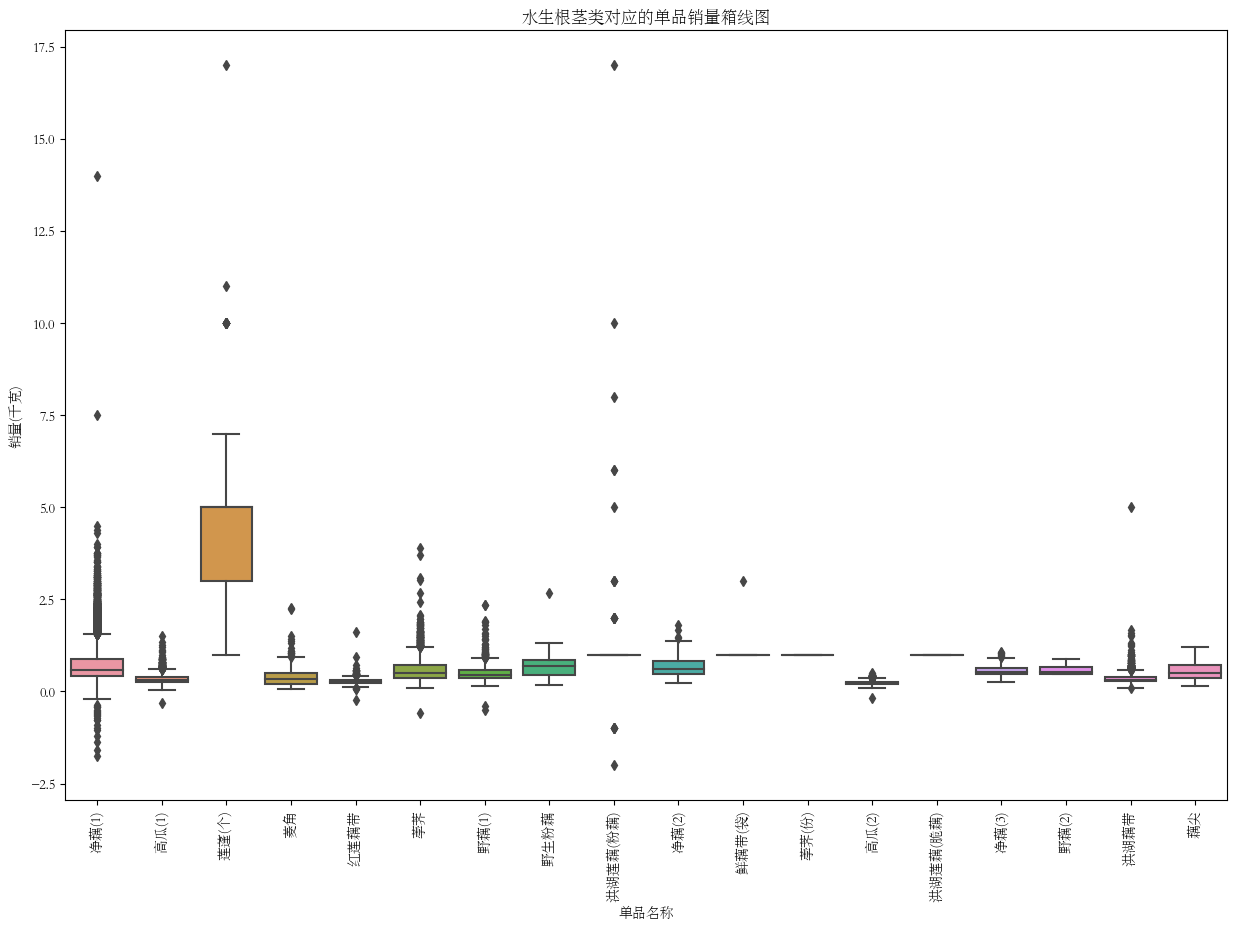

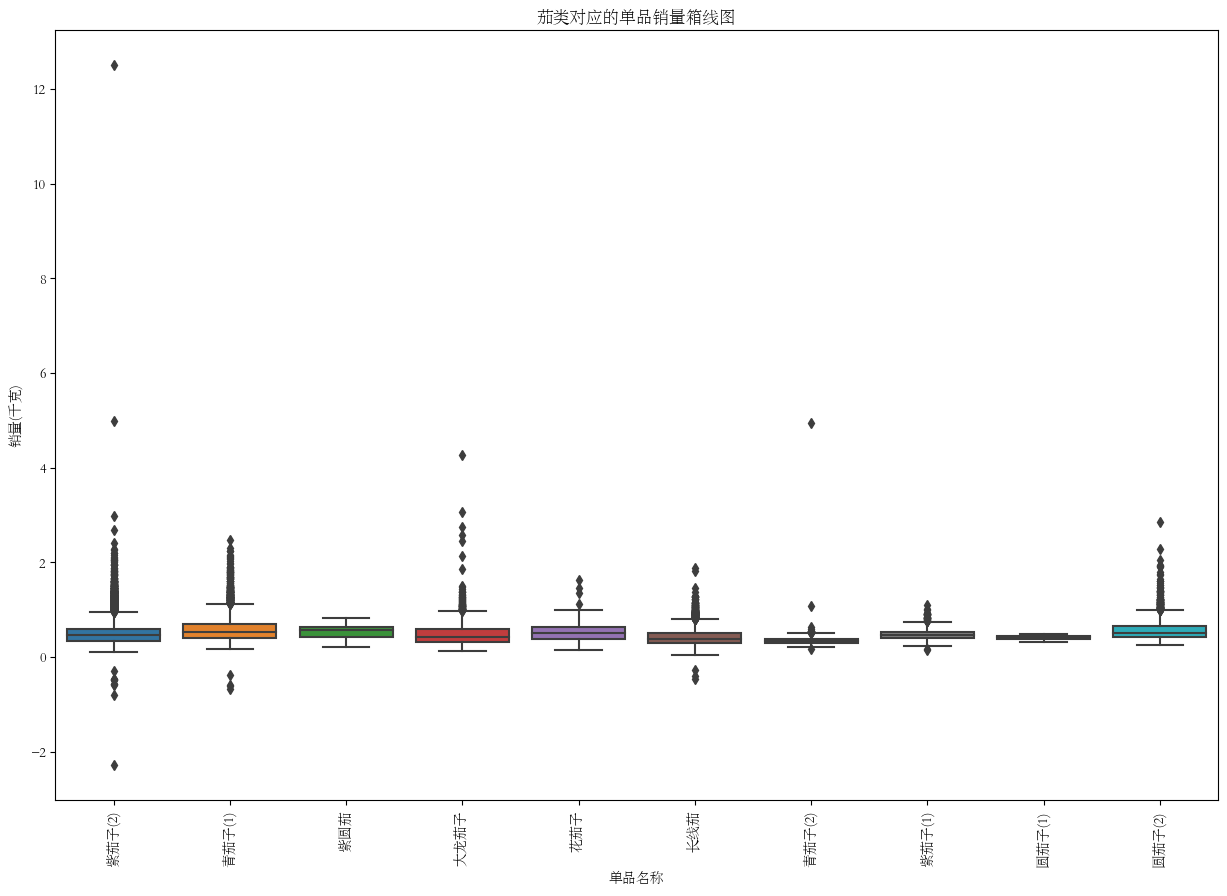

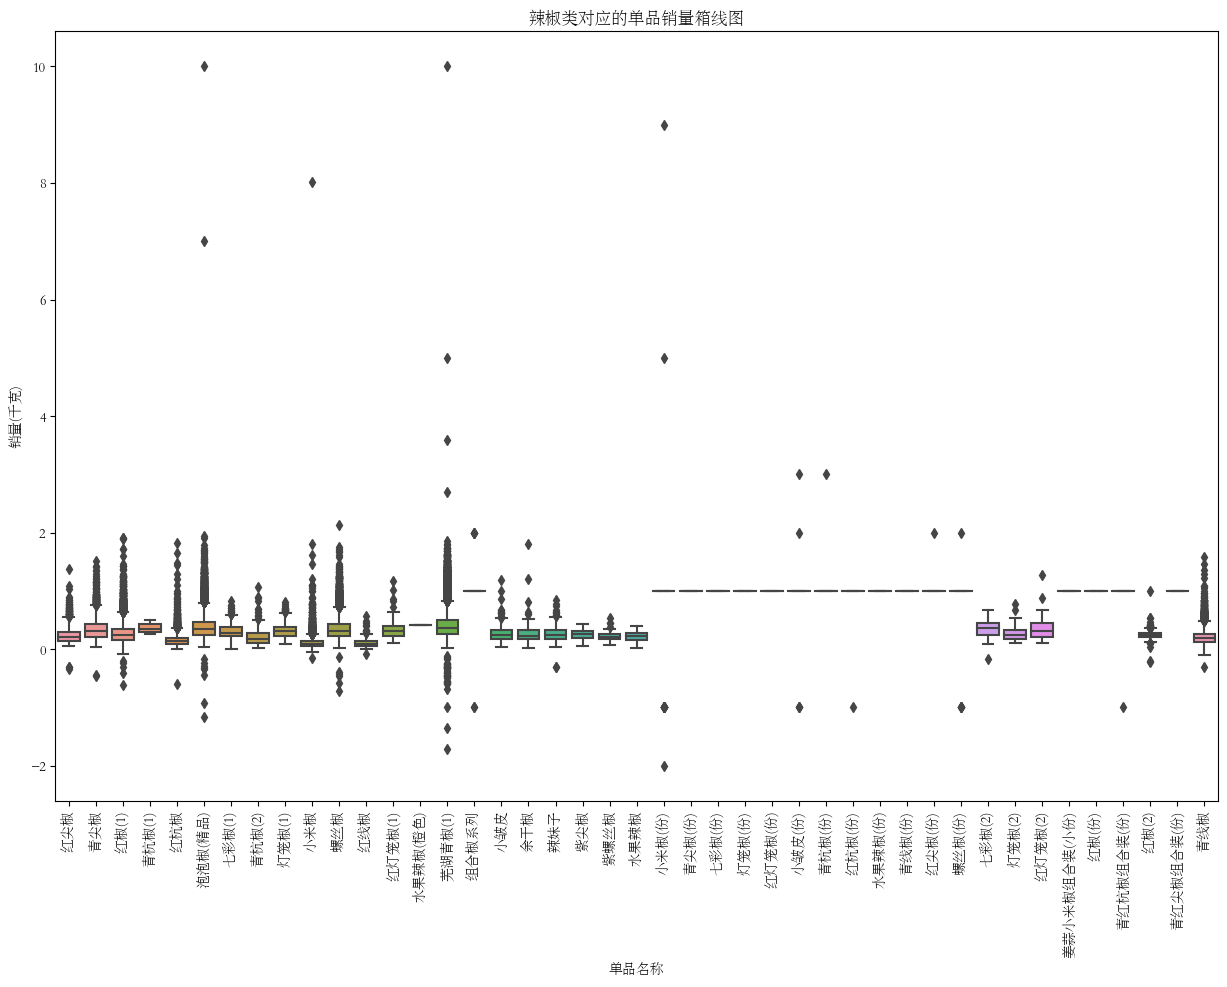

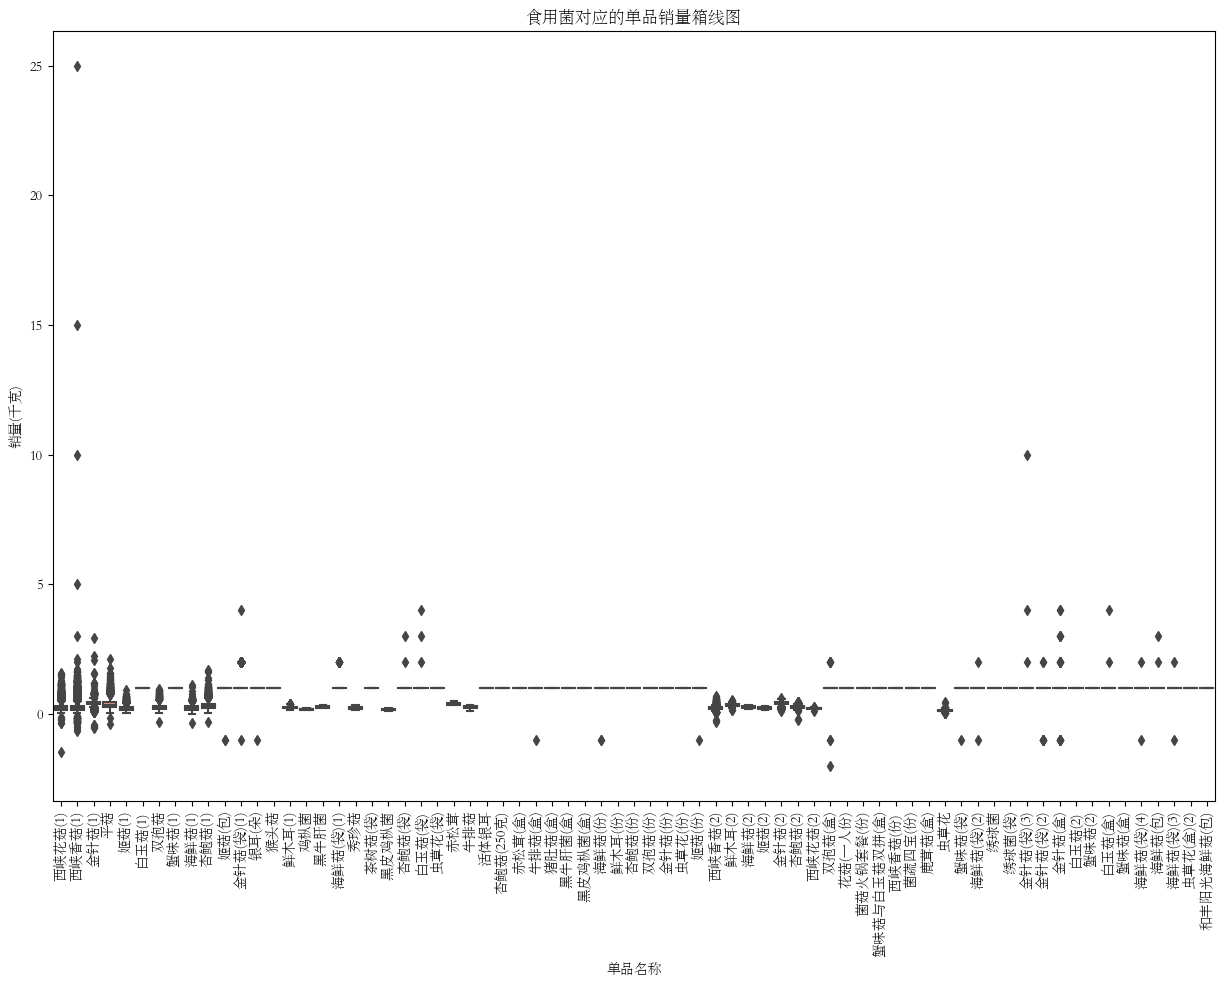

In [12]:
# 画出6个品类各自对应的单品销量箱线图，一共6张
categories = df['分类名称'].unique()
for category in categories:
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='单品名称', y='销量(千克)', data=df[df['分类名称'] == category])
    plt.xticks(rotation=90)
    plt.xlabel('单品名称')
    plt.ylabel('销量(千克)')
    plt.title(f'{category}对应的单品销量箱线图')
    plt.savefig(f'{category}对应的单品销量箱线图.png', dpi=600)
    plt.show()

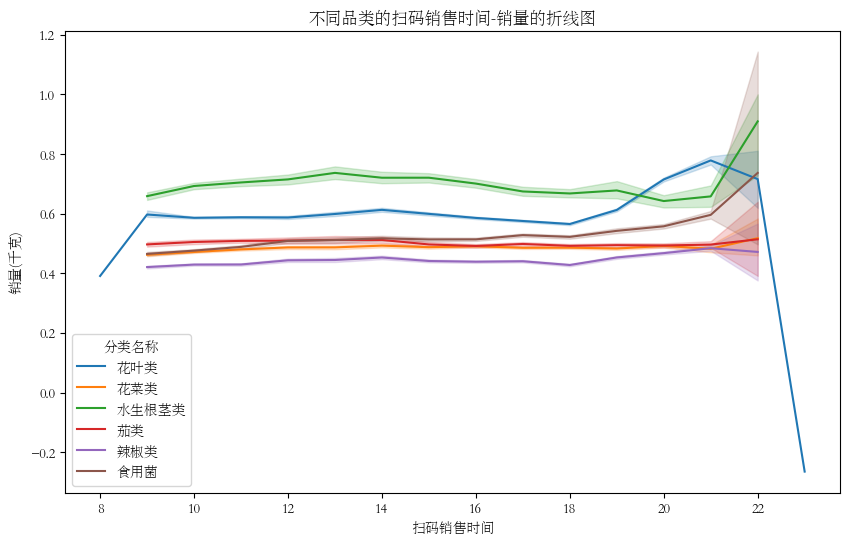

In [13]:
# 画出扫码销售时间-销量的折线图，6个品类画在一张图上
df['扫码销售时间'] = pd.to_datetime(df['扫码销售时间']) # 转换为日期时间格式
df['扫码销售时间'] = df['扫码销售时间'].dt.hour # 提取小时部分
plt.figure(figsize=(10, 6))
sns.lineplot(x='扫码销售时间', y='销量(千克)', hue='分类名称', data=df)
plt.xlabel('扫码销售时间')
plt.ylabel('销量(千克)')
plt.title('不同品类的扫码销售时间-销量的折线图')
plt.savefig('不同品类的扫码销售时间-销量的折线图.png', dpi=600)
plt.show()

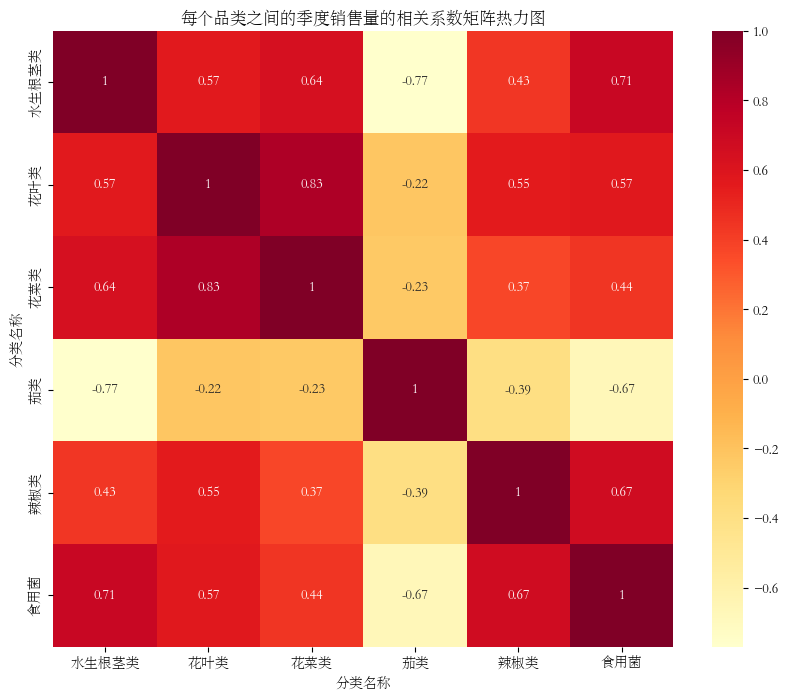

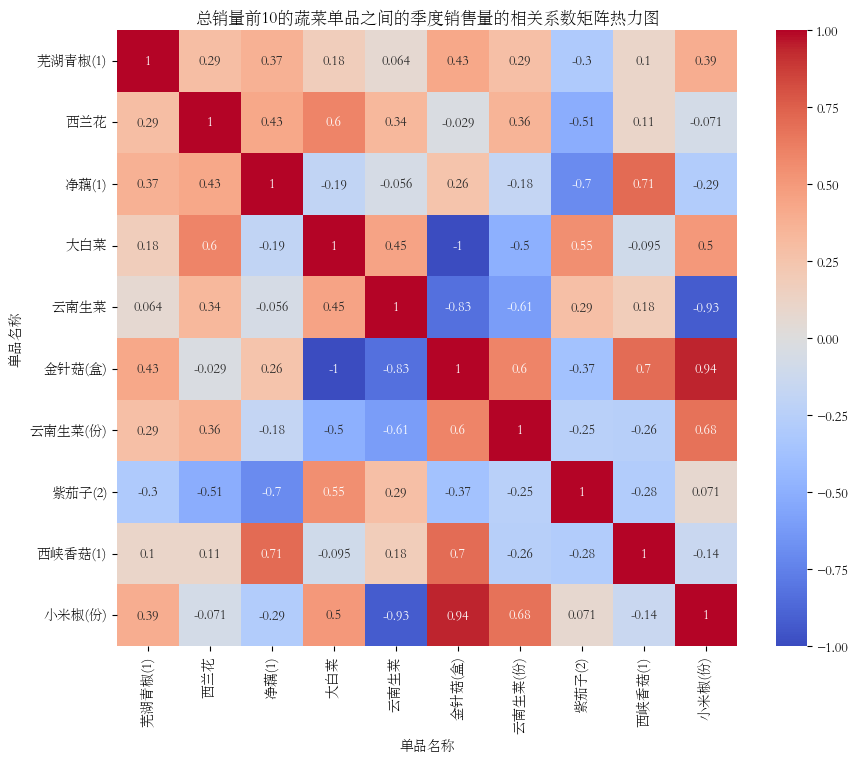

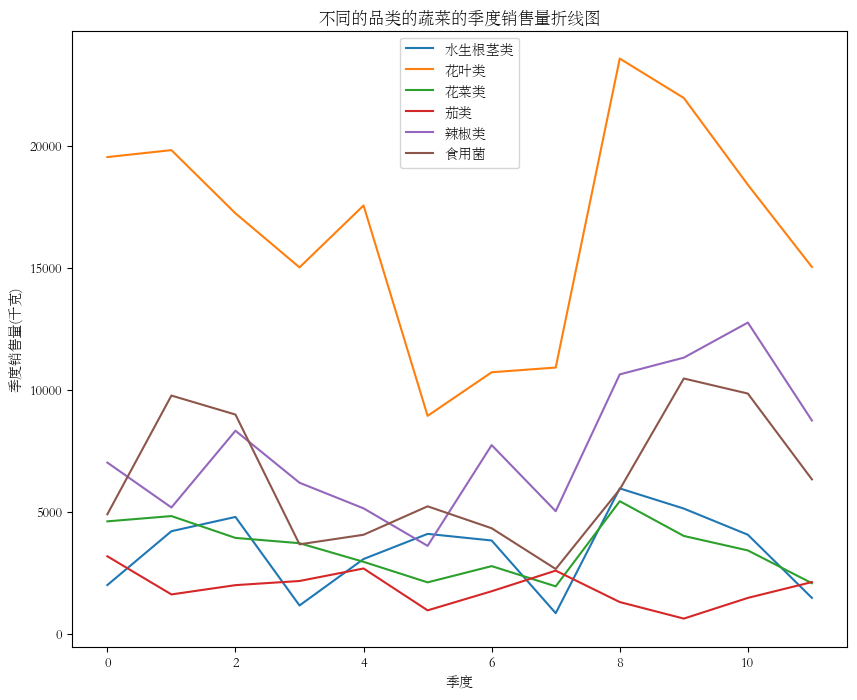

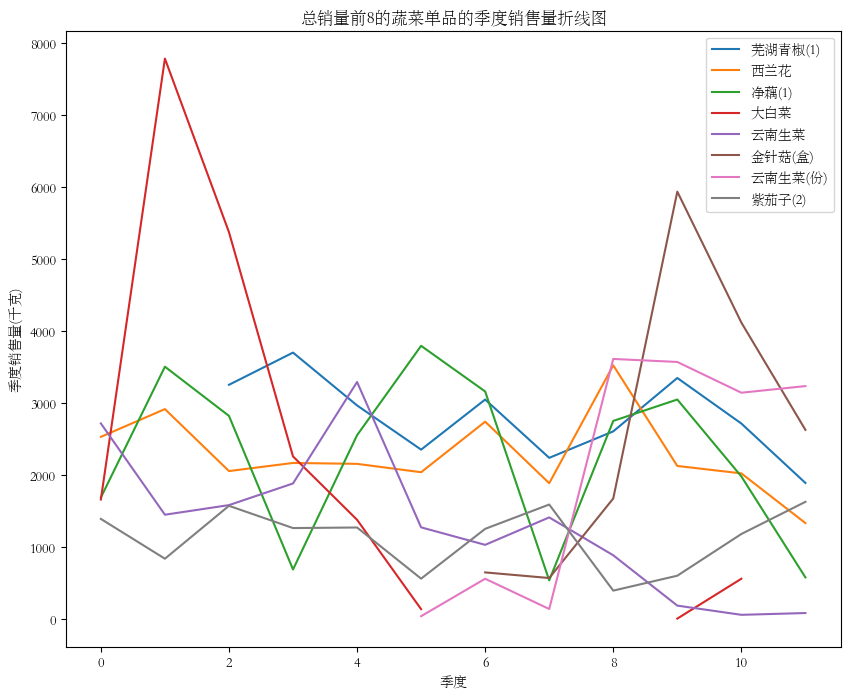

In [14]:
# 将销售日期列转换为日期时间格式
df['销售日期'] = pd.to_datetime(df['销售日期'])

# 提取月份部分和年份部分
df['月份'] = df['销售日期'].dt.month
df['年份'] = df['销售日期'].dt.year

# 按月整理每品类蔬菜的销售量
df_category = df[df['销售类型'] == '销售'].groupby(['分类名称', '年份', '月份'])['销量(千克)'].sum().reset_index()
df_category.head()
df_category.to_csv('按月整理每品类蔬菜的销售量.csv', index=False, encoding='utf_8_sig')

# 按月整理每单品蔬菜的销售量
df_product = df[df['销售类型'] == '销售'].groupby(['单品名称', '年份', '月份'])['销量(千克)'].sum().reset_index()
df_product.head()

# 定义一个函数，将月份转换为数字
def month_to_number(year, month):
    if year == 2020:
        if month in [7, 8, 9]:
            return 1
        elif month in [10, 11, 12]:
            return 2
    elif year == 2021:
        if month in [1, 2, 3]:
            return 3
        elif month in [4, 5, 6]:
            return 4
        elif month in [7, 8, 9]:
            return 5
        elif month in [10, 11, 12]:
            return 6
    elif year == 2022:
        if month in [1, 2, 3]:
            return 7
        elif month in [4, 5, 6]:
            return 8
        elif month in [7, 8, 9]:
            return 9
        elif month in [10, 11,12]:
            return 10
    else:
        if month in [1, 2, 3]:
            return 11
        elif month in [4, 5, 6]:
            return 12

# 将月份列转换为数字列
df_category['数字'] = df_category.apply(lambda x: month_to_number(x['年份'], x['月份']), axis=1)
df_product['数字'] = df_product.apply(lambda x: month_to_number(x['年份'], x['月份']), axis=1)

# 按数字相加每品类蔬菜的销售量
df_category_number = df_category.groupby(['分类名称', '数字'])['销量(千克)'].sum().reset_index()
df_category_number.head()

# 按数字相加每单品蔬菜的销售量
df_product_number = df_product.groupby(['单品名称', '数字'])['销量(千克)'].sum().reset_index()
df_product_number.head()

# 将数据框转置，让行列互换
df_category_number = df_category_number.pivot_table(index='分类名称', columns='数字', values='销量(千克)').T.reset_index(drop=True)
df_product_number = df_product_number.pivot_table(index='单品名称', columns='数字', values='销量(千克)').T.reset_index(drop=True)

# 计算每个品类之间的季度销售量的相关系数矩阵
category_corr = df_category_number.corr(method='spearman')
category_corr.head()

# 计算总销量前10的蔬菜单品之间的季度销售量的相关系数矩阵
product_all_corr = df_product_number.corr(method='spearman')
product_all_corr.to_csv('所有单品的季度销售量相关矩阵系数.csv', index=False, encoding='utf_8_sig')
top10_products = df_product_number.sum().sort_values(ascending=False).head(10).index
product_corr = df_product_number[top10_products].corr(method='spearman')
product_corr.head()

# 画出每个品类之间的季度销售量的相关系数矩阵热力图
plt.figure(figsize=(10, 8))
sns.heatmap(category_corr, annot=True, cmap='YlOrRd', xticklabels=category_corr.index, yticklabels=category_corr.index)
plt.title('每个品类之间的季度销售量的相关系数矩阵热力图')
plt.savefig('品类之间的季度销售量的相关系数矩阵热力图.png', dpi=600)

# 画出总销量前10的蔬菜单品之间的季度销售量的相关系数矩阵热力图
plt.figure(figsize=(10, 8))
sns.heatmap(product_corr, annot=True, cmap='coolwarm', xticklabels=product_corr.index, yticklabels=product_corr.index)
plt.title('总销量前10的蔬菜单品之间的季度销售量的相关系数矩阵热力图')
plt.savefig('总销量前10的蔬菜单品之间的季度销售量的相关系数矩阵热力图.png', dpi=600)

# 按数字为横坐标，季度销售量为纵坐标，将不同的品类的蔬菜的季度销售量折线都画在一张图上
plt.figure(figsize=(10, 8))
for category in df_category_number.columns:
    plt.plot(df_category_number[category], label=category)
plt.xlabel('季度')
plt.ylabel('季度销售量(千克)')
plt.legend()
plt.title('不同的品类的蔬菜的季度销售量折线图')
plt.savefig('不同的品类的蔬菜的季度销售量折线图.png', dpi=600)

# 按数字为横坐标，季度销售量为纵坐标，将总销量前5的蔬菜单品的季度销售量折线都画在一张图上
top8_products = df_product_number.sum().sort_values(ascending=False).head(8).index
plt.figure(figsize=(10, 8))
for product in top8_products:
    plt.plot(df_product_number[product], label=product)
plt.xlabel('季度')
plt.ylabel('季度销售量(千克)')
plt.legend()
plt.title('总销量前8的蔬菜单品的季度销售量折线图')
plt.savefig('总销量前8的蔬菜单品的季度销售量折线图.png', dpi=600)
